<a href="https://colab.research.google.com/github/minhcong00/AI/blob/main/BT_AI_W9_CIFAR100_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import cifar100
(x_train, y_train),(x_test,y_test)=cifar100.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
class_names={0:'apple', 1:'aquarium_fish', 2:'baby', 3:'bear', 4:'beaver', 5:'bed', 6:'bee', 7:'beetle', 8:'bicycle', 9:'bottle', 10:'bowl',
             11:'boy', 12:'bridge', 13:'bus', 14:'butterfly', 15:'camel', 16:'can',17:'castle', 18:'caterpillar', 19:'cattle', 20:'chair',
             21:'chimpanzee', 22:'clock', 23:'cloud', 24:'cockroach', 25:'couch', 26:'cra', 27:'crocodile', 28:'cup', 29:'dinosaur', 30:'dolphin',
             31:'elephant', 32:'flatfish', 33:'forest', 34:'fox', 35:'girl', 36:'hamster', 37:'house', 38:'kangaroo', 39:'keyboard', 40:'lamp',
             41:'lawn_mower', 42:'leopard', 43:'lion', 44:'lizard', 45:'lobster', 46:'man', 47:'maple_tree', 48:'motorcycle', 49:'mountain', 50:'mouse',
             51:'mushroom', 52:'oak_tree', 53:'orange', 54:'orchid', 55: 'otter', 56: 'palm_tree', 57:'pear', 58:'pickup_truck', 59:'pine_tree', 60:'plain',
             61:'plate', 62:'poppy', 63:'porcupine', 64:'possum', 65:'rabbit', 66:'raccoon', 67:'ray', 68:'road', 69:'rocket', 70:'rose',
             71:'sea', 72:'seal', 73:'shark', 74:'shrew', 75:'skunk', 76:'skyscraper', 77:'snail', 78:'snake', 79:'spider', 80:'squirrel',
             81:'streetcar', 82: 'sunflower', 83:'sweet_pepper', 84: 'table', 85:'tank', 86:'telephone', 87:'television', 88:'tiger', 89:'tractor', 90:'train',
             91:'trout', 92:'tulip', 93:'turtle', 94:'wardrobe', 95: 'whale', 96:'willow_tree', 97: 'wolf', 98:'woman', 99:'worm'}

anh nay la: [0]


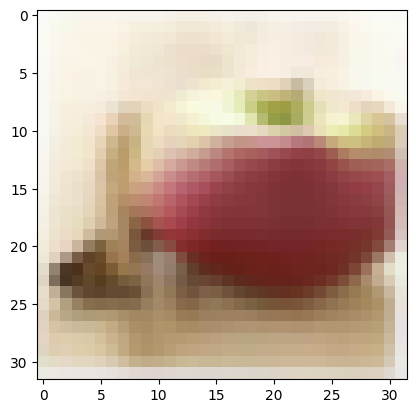

In [5]:
digit=x_train[2]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print('anh nay la:',y_train[2])

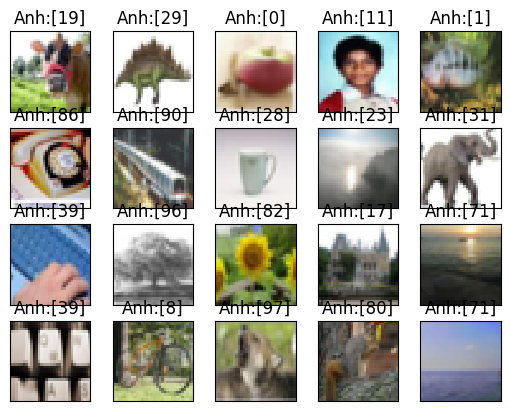

In [6]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout
  plt.imshow(x_train[i],cmap='gray', interpolation='none')
  plt.title('Anh:{}'.format(y_train[i])) 
  plt.xticks([])
  plt.yticks([])

In [7]:
from keras.models import Sequential
from keras.layers import Dense 
model = Sequential()
model.add(Dense(5000, activation='relu',input_shape=(32*32*3,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              15365000  
                                                                 
 dense_1 (Dense)             (None, 512)               2560512   
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
Total params: 17,976,812
Trainable params: 17,976,812
Non-trainable params: 0
_________________________________________________________________


In [8]:
x_train=x_train.reshape((50000,32*32*3))
x_train=x_train.astype('float32')/255
x_train.shape

(50000, 3072)

In [9]:
x_test=x_test.reshape((10000,32*32*3))
x_test=x_test.astype('float32')/255
x_test.shape

(10000, 3072)

In [10]:
from keras.utils import to_categorical
y_train= to_categorical(y_train,100)
y_train.shape 

(50000, 100)

In [11]:
y_test= to_categorical(y_test,100)
y_test.shape 

(10000, 100)

In [12]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20,batch_size=256)
test_loss,test_acc= model.evaluate(x_test, y_test)
print('do mat mat:',test_loss)
print('do chinh xac:',test_acc)

Epoch 1/20
196/196 [==============================] - 122s 620ms/step - loss: 4.8031 - accuracy: 0.0488
Epoch 2/20
196/196 [==============================] - 120s 610ms/step - loss: 3.8821 - accuracy: 0.1046
Epoch 3/20
196/196 [==============================] - 119s 609ms/step - loss: 3.6852 - accuracy: 0.1379
Epoch 4/20
196/196 [==============================] - 120s 611ms/step - loss: 3.5555 - accuracy: 0.1616
Epoch 5/20
196/196 [==============================] - 122s 620ms/step - loss: 3.4440 - accuracy: 0.1820
Epoch 6/20
196/196 [==============================] - 122s 623ms/step - loss: 3.3494 - accuracy: 0.1991
Epoch 7/20
196/196 [==============================] - 123s 627ms/step - loss: 3.2655 - accuracy: 0.2129
Epoch 8/20
196/196 [==============================] - 124s 634ms/step - loss: 3.1966 - accuracy: 0.2270
Epoch 9/20
196/196 [==============================] - 123s 626ms/step - loss: 3.1136 - accuracy: 0.2409
Epoch 10/20
196/196 [==============================] - 122s 625m

In [13]:
from keras.saving.saving_api import load_model
model.save('cifar100_1.h5')

In [14]:
model10=load_model('cifar100_1.h5')

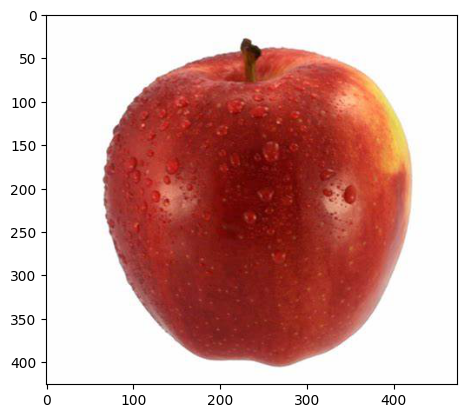

In [15]:
from keras.utils import load_img
url = '/content/apple.jpg'
img = load_img(url)
plt.imshow(img)

1/1 [==============================] - 0s 107ms/step
Con nay la:  0


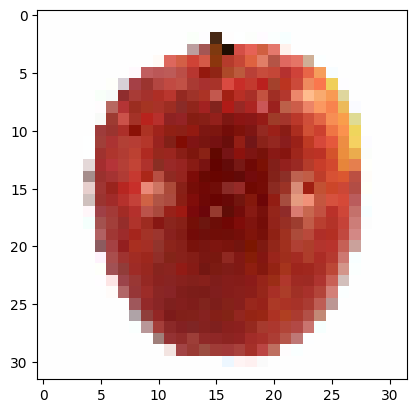

In [16]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255   
pred_value = np.argmax(model.predict(img))
print('Con nay la: ', pred_value)

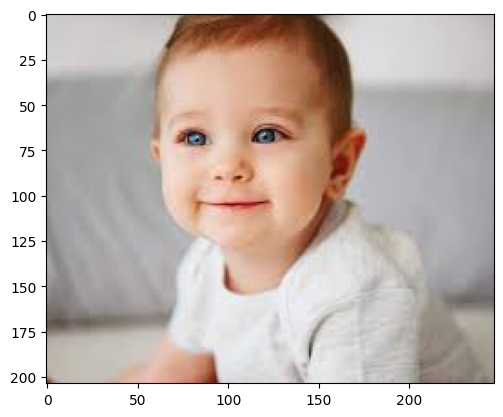

In [26]:
from keras.utils import load_img
url = '/content/baby.jpg'
img = load_img(url)
plt.imshow(img)

1/1 [==============================] - 0s 33ms/step
Con nay la:  2


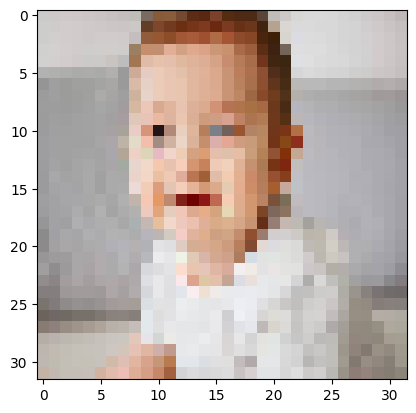

In [27]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255   
pred_value = np.argmax(model.predict(img))
print('Con nay la: ', pred_value)